In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the Numerical Model Validation Data

In [21]:
df=pd.read_csv(r'C:\Users\medik\OneDrive\Desktop\CSV Files\Data2.csv')
df

,Hours,Microbe,Sucrose,Biosurfactant
0,0,0.152167,19.234000,0.031720
1,1,0.157550,19.205757,0.028556
2,2,0.163120,19.176536,0.030841
3,3,0.168882,19.146303,0.033205
4,4,0.174844,19.115025,0.035651
...,...,...,...,...
128,128,2.814984,5.263294,1.118856
129,129,2.815587,5.260127,1.119104
130,130,2.816104,5.257414,1.119316
131,131,2.816547,5.255091,1.119498


In [23]:
df.shape

(133, 4)

In [28]:
X=df.iloc[:,1:3]
Y=df.iloc[:,3]

## Splitting the data into training and testing data

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [38]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the testing data

In [40]:
LR.predict(X_test)

array([0.07636626, 1.06414732, 0.0333578 , 1.03133084, 1.07069977,
       0.30983096, 0.0287086 , 0.87252178, 0.98764751, 1.04909853,
       0.08027462, 1.10374323, 0.99955742, 0.04366011, 0.55139712,
       0.08848802, 0.25921545, 0.78877323, 0.70212473, 1.10114701,
       0.24085515, 0.80591957, 1.1173335 , 0.65052755, 1.10601987,
       0.12183802, 0.21520344, 1.11618007, 0.58365886, 0.26880103,
       1.11881378, 0.68483315, 0.73684402, 0.97509436, 0.1272376 ,
       0.08430608, 0.10661241, 0.06537821, 0.41894791, 1.11545881])

## Coefficient of the linear model

In [42]:
LR.coef_

array([11.16423034,  2.04971676])

## Intercept of the linear model

In [71]:
LR.intercept_

-41.096577940828524

## Equation of the model:
    Y = 11.16423034 * ['Microbe Conc.'] + 2.04971676 * ['Sucrose Conc.'] - 41.096577940828524

## Mean Square Error

In [70]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,LR.predict(X_test))

8.418502202392904e-09

## Plots: Time (hrs) vs Biosurfactant (g/l)

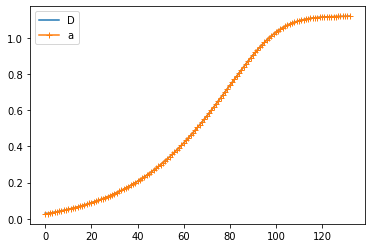

In [75]:
plt.plot(df['Hours'],Y)
plt.legend('Experimental Data')
plt.plot(df['Hours'].values,LR.predict(X),marker='+')
plt.legend('Data Driven Model')
plt.show()